## 1. 데이터 확인

## 1. 데이터 확인

### 필수 라이브러리

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') # 경고 메세지 무시

In [2]:
df_train_origin = pd.read_csv("./data/train.csv") # 학습용 데이터
df_test_origin = pd.read_csv("./data/submission.csv") # 테스트 데이터(제출파일의 데이터)

In [3]:
df_train_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59299 entries, 0 to 59298
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   bant_submit              59299 non-null  float64
 1   customer_country         58317 non-null  object 
 2   business_unit            59299 non-null  object 
 3   com_reg_ver_win_rate     14568 non-null  float64
 4   customer_idx             59299 non-null  int64  
 5   customer_type            15338 non-null  object 
 6   enterprise               59299 non-null  object 
 7   historical_existing_cnt  13756 non-null  float64
 8   id_strategic_ver         3444 non-null   float64
 9   it_strategic_ver         1121 non-null   float64
 10  idit_strategic_ver       4565 non-null   float64
 11  customer_job             40566 non-null  object 
 12  lead_desc_length         59299 non-null  int64  
 13  inquiry_type             58358 non-null  object 
 14  product_category      

## 2. 데이터 전처리

### 각 변수별 확인

In [4]:
df_train = pd.read_csv('./data/Ch2/df_train.csv')
df_test = pd.read_csv('./data/Ch2/df_test.csv')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59299 entries, 0 to 59298
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   bant_submit              59299 non-null  float64
 1   customer_country         59299 non-null  object 
 2   business_unit            59299 non-null  object 
 3   com_reg_ver_win_rate     14568 non-null  float64
 4   customer_idx             59299 non-null  int64  
 5   customer_type            59299 non-null  object 
 6   enterprise               59299 non-null  object 
 7   historical_existing_cnt  59299 non-null  float64
 8   id_strategic_ver         59299 non-null  float64
 9   it_strategic_ver         59299 non-null  float64
 10  idit_strategic_ver       59299 non-null  float64
 11  customer_job             59299 non-null  object 
 12  lead_desc_length         59299 non-null  int64  
 13  inquiry_type             59299 non-null  object 
 14  product_category      

## 3. 피처엔지니어링

### 레이블 인코딩

In [6]:
from sklearn.preprocessing import LabelEncoder

# 레이블 인코딩할 칼럼들
label_columns = [
    "customer_country",
    "business_subarea",
    "business_area",
    "business_unit",
    "customer_type",
    "enterprise",
    "customer_job",
    "inquiry_type",
    "product_category",
    "product_subcategory",
    "product_modelname",
    "customer_country.1",
    "customer_position",
    "response_corporate",
    "expected_timeline",
]

# df_train과 df_test를 복사하여 새로운 데이터프레임을 생성
df_train_encoded = df_train.copy()
df_test_encoded = df_test.copy()

# 레이블 인코딩 적용
for col in label_columns:
    encoder = LabelEncoder()
    combined_data = pd.concat([df_train_encoded[col], df_test_encoded[col]])
    encoder.fit(combined_data)
    df_train_encoded[col] = encoder.transform(df_train_encoded[col])
    df_test_encoded[col] = encoder.transform(df_test_encoded[col])


'com_reg_ver_win_rate' 에 대한 결측치 처리

In [7]:
from sklearn.ensemble import RandomForestRegressor

def fill_missing_values(df):
    # 데이터에서 결측치가 없는 행과 결측치가 있는 행 분리
    train_data = df[df['com_reg_ver_win_rate'].notna()]
    test_data = df[df['com_reg_ver_win_rate'].isna()]

    # 'com_reg_ver_win_rate'를 예측하는 데 사용할 피처 선택
    features = ['business_area', 'business_unit', 'customer_country.1']   

    # 훈련 데이터와 테스트 데이터 준비
    X_train = train_data[features]
    y_train = train_data['com_reg_ver_win_rate']
    X_test = test_data[features]

    # 랜덤 포레스트 모델 생성 및 훈련
    model = RandomForestRegressor(random_state=0)
    model.fit(X_train, y_train)

    # 모델을 사용해 결측치 예측
    predicted_values = model.predict(X_test)

    # 예측값으로 결측치 대체
    df.loc[df['com_reg_ver_win_rate'].isna(), 'com_reg_ver_win_rate'] = predicted_values


# df_train_encoded에 대한 데이터 처리
fill_missing_values(df_train_encoded)

# df_test_encoded에 대한 데이터 처리
fill_missing_values(df_test_encoded)

In [8]:
print(df_train_encoded['com_reg_ver_win_rate'].isnull().sum())

0


In [9]:
df_test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5271 entries, 0 to 5270
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5271 non-null   int64  
 1   bant_submit              5271 non-null   float64
 2   customer_country         5271 non-null   int32  
 3   business_unit            5271 non-null   int32  
 4   com_reg_ver_win_rate     5271 non-null   float64
 5   customer_idx             5271 non-null   int64  
 6   customer_type            5271 non-null   int32  
 7   enterprise               5271 non-null   int32  
 8   historical_existing_cnt  5271 non-null   float64
 9   id_strategic_ver         5271 non-null   float64
 10  it_strategic_ver         5271 non-null   float64
 11  idit_strategic_ver       5271 non-null   float64
 12  customer_job             5271 non-null   int32  
 13  lead_desc_length         5271 non-null   int64  
 14  inquiry_type            

### 파생변수 생성

In [10]:
## strategic ##
# 변수 'id_business_area' 생성
df_train_encoded['id_business_area'] = df_train_encoded['id_strategic_ver'] * df_train_encoded['business_subarea'] 
df_test_encoded['id_business_area'] = df_test_encoded['id_strategic_ver'] * df_test_encoded['business_subarea'] 

# 변수 'it_business_area' 생성
df_train_encoded['it_business_area'] = df_train_encoded['it_strategic_ver']  * df_train_encoded['business_subarea'] 
df_test_encoded['it_business_area'] = df_test_encoded['it_strategic_ver'] * df_test_encoded['business_subarea']

# 변수 'idit_business_area' 생성
df_train_encoded['idit_business_area'] = df_train_encoded['idit_strategic_ver'] * df_train_encoded['business_area'] * df_train_encoded['business_unit']
df_test_encoded['idit_business_area'] = df_test_encoded['idit_strategic_ver'] * df_test_encoded['business_area'] * df_test_encoded['business_unit']


## ver ##
# 변수 'ver_cus_business_area' 생성
df_train_encoded['ver_cus_business_area'] = df_train_encoded['ver_cus'] * df_train_encoded['business_subarea']
df_test_encoded['ver_cus_business_area'] = df_test_encoded['ver_cus'] * df_test_encoded['business_subarea']

# 변수 'ver_pro_product_category' 생성
df_train_encoded['ver_pro_product_category'] = df_train_encoded['ver_pro'] * df_train_encoded['product_category'] * df_train_encoded['business_subarea']
df_test_encoded['ver_pro_product_category'] = df_test_encoded['ver_pro'] * df_test_encoded['product_category'] * df_test_encoded['business_subarea']


## 추가 고려 ## 
# 변수 'category_modelname' 생성
df_train_encoded['category_modelname'] = df_train_encoded['product_category'] * df_train_encoded['product_subcategory'] * df_train_encoded['product_modelname']
df_test_encoded['category_modelname'] = df_test_encoded['product_category'] * df_test_encoded['product_subcategory'] * df_test_encoded['product_modelname']

# 변수 'inquiry_unit' 생성
df_train_encoded['inquiry_unit'] = df_train_encoded['inquiry_type'] * df_train_encoded['business_unit']
df_test_encoded['inquiry_unit'] = df_test_encoded['inquiry_type'] * df_test_encoded['business_unit']

# 변수 'inquiry_catagory' 생성
df_train_encoded['inquiry_catagory'] = df_train_encoded['inquiry_type'] * df_train_encoded['product_category']
df_test_encoded['inquiry_catagory'] = df_test_encoded['inquiry_type'] * df_test_encoded['product_category']


데이터의 분포를 시각화를 통해 'business_subarea' 와 "strategic_ver" 계열 데이터 간의 관계를 확인

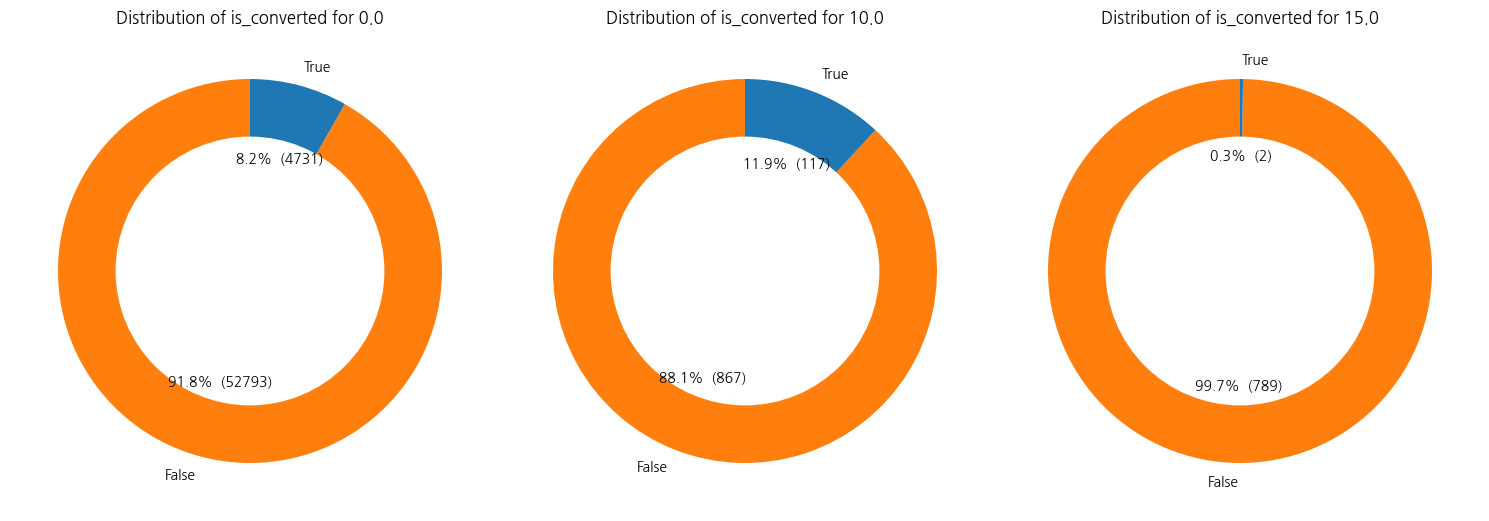

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# it_business_area의 고유한 값들을 가져옵니다.
business_areas = df_train_encoded['idit_business_area'].unique()

# 행과 열의 수를 계산합니다.
n = len(business_areas)
ncols = 3
nrows = n // ncols if n % ncols == 0 else n // ncols + 1

fig, axs = plt.subplots(nrows, ncols, figsize=(15, 15))

# axs를 항상 2차원 배열로 처리합니다.
if nrows == 1:
    axs = axs[np.newaxis, :]
if ncols == 1:
    axs = axs[:, np.newaxis]

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return '{p:.1f}%  ({v:d})'.format(p=pct, v=val)
    return my_autopct

colors = {True: '#1f77b4', False: '#ff7f0e'}

for i, area in enumerate(business_areas):
    # 특정 business_area에 해당하는 데이터만 선택합니다.
    subset = df_train_encoded[df_train_encoded['idit_business_area'] == area]
    
    # is_converted의 값에 따라 데이터를 그룹화하고 카운트합니다.
    counts = subset['is_converted'].value_counts()
    
    # 도넛 차트를 생성합니다.
    ax = axs[i // ncols, i % ncols]
    ax.pie(counts, labels=counts.index, autopct=make_autopct(counts), startangle=90, 
           colors=[colors[idx] for idx in counts.index])  # 색상 지정
    ax.set_title(f'Distribution of is_converted for {area}')
    ax.add_artist(plt.Circle((0,0),0.70,fc='white'))
    
# 빈 subplot을 숨깁니다.
for j in range(i+1, nrows*ncols):
    fig.delaxes(axs.flatten()[j])

plt.tight_layout()
plt.show()


포함하지 않는 변수들에 대해서 drop

In [12]:
df_train_encoded = df_train_encoded.drop(['id_strategic_ver', 'it_strategic_ver', 'idit_strategic_ver'], axis=1)
df_test_encoded = df_test_encoded.drop(['id_strategic_ver', 'it_strategic_ver', 'idit_strategic_ver'], axis=1)

df_train_encoded = df_train_encoded.drop(['ver_cus', 'ver_pro'], axis=1)
df_test_encoded = df_test_encoded.drop(['ver_cus', 'ver_pro'], axis=1)

df_train_encoded = df_train_encoded.drop(['business_unit', 'business_area','business_subarea'], axis=1)
df_test_encoded = df_test_encoded.drop(['business_unit', 'business_area','business_subarea'], axis=1)         

df_train_encoded = df_train_encoded.drop(['product_category', 'product_subcategory'], axis=1)
df_test_encoded = df_test_encoded.drop(['product_category', 'product_subcategory'], axis=1)

### 변수중요도

In [13]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

# 데이터셋을 훈련 세트와 테스트 세트로 나누기
X = df_train_encoded.drop(columns=['is_converted'])
y = df_train_encoded['is_converted']

# 80%를 훈련 세트로, 20%를 테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 데이터셋 준비
dtrain = xgb.DMatrix(X_train, label=y_train)
param = {'max_depth': 8, 'learning_rate': 0.1}
num_round = 300
bst = xgb.train(param, dtrain, num_round)

# 특성 중요도 확인
feature_importance = bst.get_score(importance_type='gain')

# 특성 중요도를 데이터프레임으로 변환
feature_importance_df = pd.DataFrame.from_dict(feature_importance, orient='index', columns=['Importance'])
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df.to_string())


                          Importance
customer_idx                1.618362
idit_business_area          1.125052
ver_win_ratio_per_bu        0.426910
lead_owner                  0.363388
customer_type               0.326573
inquiry_unit                0.324385
id_business_area            0.285964
customer_country.1          0.274179
response_corporate          0.251744
lead_desc_length            0.193153
it_business_area            0.183460
ver_pro_product_category    0.181588
inquiry_catagory            0.173571
historical_existing_cnt     0.170544
com_reg_ver_win_rate        0.158221
ver_win_rate_x              0.152722
ver_cus_business_area       0.140559
customer_country            0.129302
expected_timeline           0.128412
product_modelname           0.127724
category_modelname          0.123645
bant_submit                 0.116974
inquiry_type                0.116676
enterprise                  0.115935
customer_position           0.113624
customer_job                0.113338


### 상관관계 히트맵

In [14]:
df_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59299 entries, 0 to 59298
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   bant_submit               59299 non-null  float64
 1   customer_country          59299 non-null  int32  
 2   com_reg_ver_win_rate      59299 non-null  float64
 3   customer_idx              59299 non-null  int64  
 4   customer_type             59299 non-null  int32  
 5   enterprise                59299 non-null  int32  
 6   historical_existing_cnt   59299 non-null  float64
 7   customer_job              59299 non-null  int32  
 8   lead_desc_length          59299 non-null  int64  
 9   inquiry_type              59299 non-null  int32  
 10  product_modelname         59299 non-null  int32  
 11  customer_country.1        59299 non-null  int32  
 12  customer_position         59299 non-null  int32  
 13  response_corporate        59299 non-null  int32  
 14  expect

In [15]:
df_test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5271 entries, 0 to 5270
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        5271 non-null   int64  
 1   bant_submit               5271 non-null   float64
 2   customer_country          5271 non-null   int32  
 3   com_reg_ver_win_rate      5271 non-null   float64
 4   customer_idx              5271 non-null   int64  
 5   customer_type             5271 non-null   int32  
 6   enterprise                5271 non-null   int32  
 7   historical_existing_cnt   5271 non-null   float64
 8   customer_job              5271 non-null   int32  
 9   lead_desc_length          5271 non-null   int64  
 10  inquiry_type              5271 non-null   int32  
 11  product_modelname         5271 non-null   int32  
 12  customer_country.1        5271 non-null   int32  
 13  customer_position         5271 non-null   int32  
 14  response

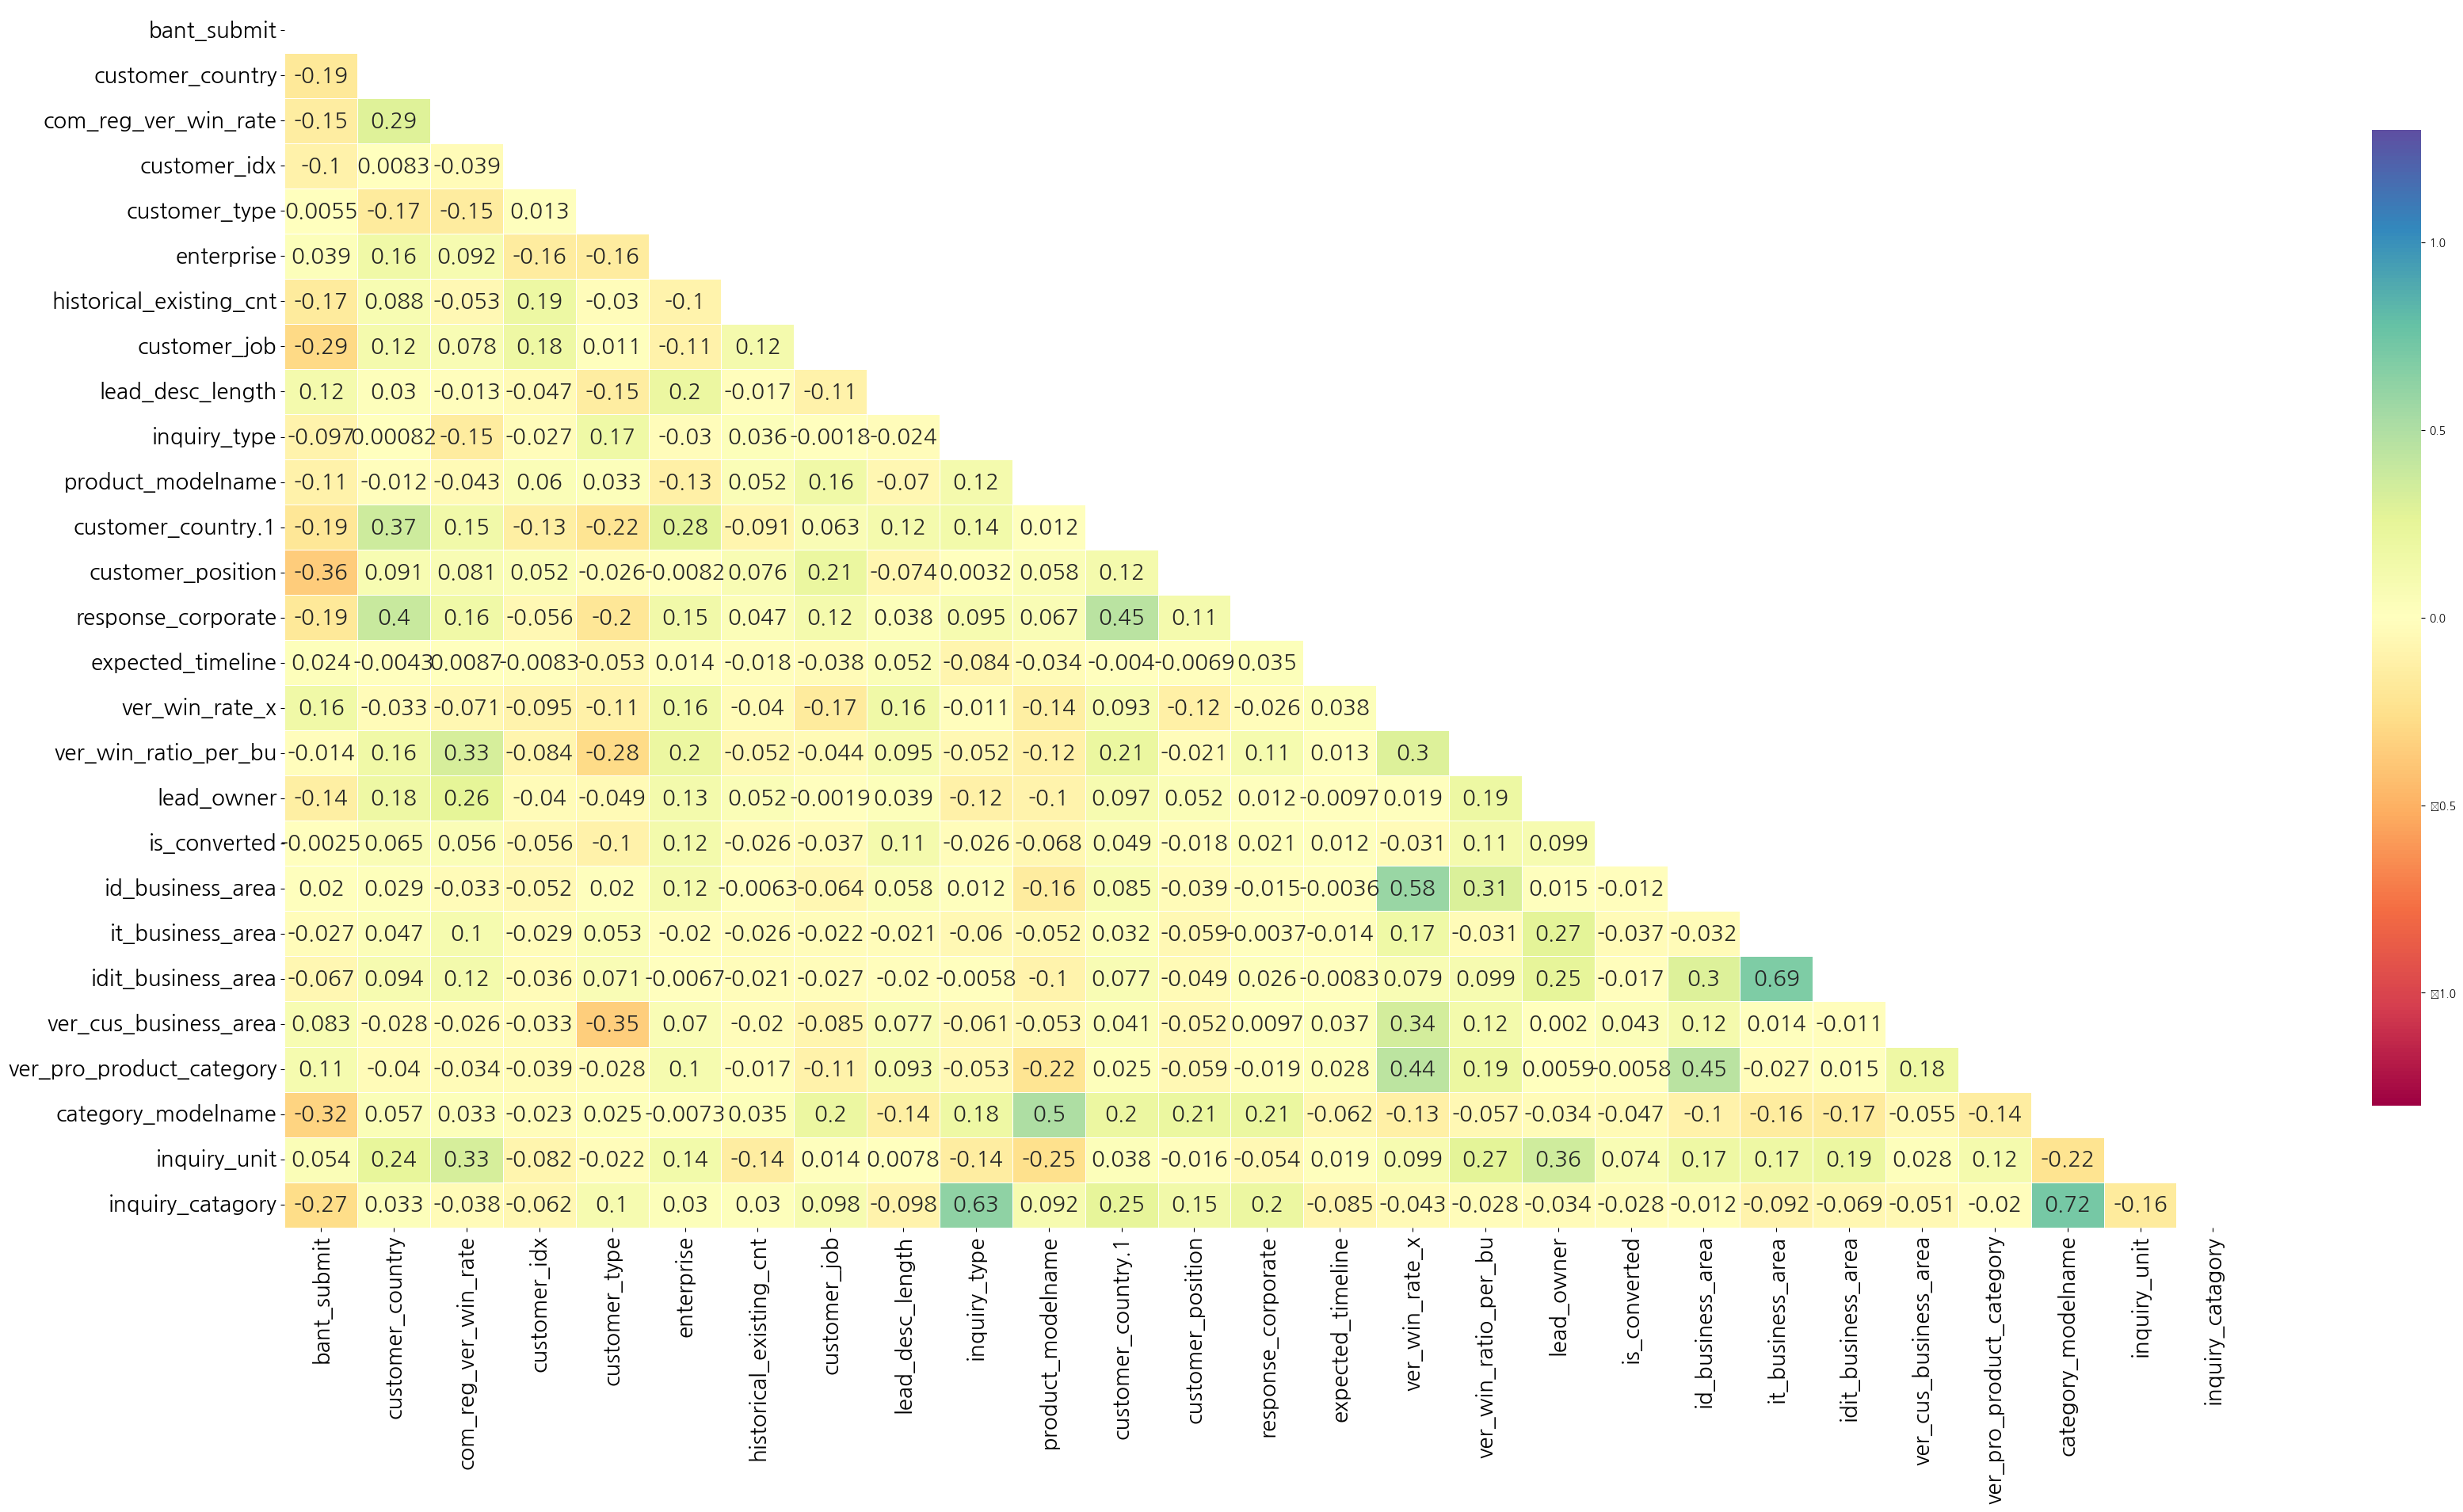

In [16]:
import numpy as np

# 숫자형 변수들 간의 상관관계 계산
corr = df_train_encoded.corr()

# 상관계수 행렬의 상삼각행렬을 마스킹하기 위한 마스크 생성
mask = np.triu(np.ones_like(corr, dtype=bool))

# 히트맵
plt.figure(figsize=(40, 20))

sns.heatmap(corr,
            mask=mask, # 마스크 적용
            annot=True, # 수치(상관관계) 표시
            annot_kws = {'size':20}, # 수치표시 사이즈
            cmap='Spectral', # 색상 변경
            vmin=-1.3, # 색상 팔레트 범위
            vmax=1.3,
            linewidths=.5, # 히트맵의 선 스타일 변경
            cbar_kws={"shrink": .8}) # 히트맵 주변에 색상 바 추가(사이즈 조절 가능)

# 변수 이름의 크기 조절
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()


In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 종속 변수와 독립 변수를 분리합니다.
y = df_train_encoded['is_converted']
X = df_train_encoded.drop(['is_converted'], axis=1)

# 각 독립 변수의 VIF를 계산합니다.
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

print(vif)

    VIF Factor                  features
0     6.811451               bant_submit
1     6.078332          customer_country
2     1.928416      com_reg_ver_win_rate
3     4.675878              customer_idx
4    10.003887             customer_type
5     1.894596                enterprise
6     1.189537   historical_existing_cnt
7     5.530015              customer_job
8     1.515205          lead_desc_length
9    43.648569              inquiry_type
10   49.690501         product_modelname
11    3.661619        customer_country.1
12    5.462730         customer_position
13    8.448267        response_corporate
14    7.307945         expected_timeline
15    3.013695            ver_win_rate_x
16    1.759154      ver_win_ratio_per_bu
17    2.988088                lead_owner
18    2.905669          id_business_area
19    3.073225          it_business_area
20    3.179337        idit_business_area
21    1.333331     ver_cus_business_area
22    1.496489  ver_pro_product_category
23   30.546001  

In [18]:
df_train_encoded = df_train_encoded.drop(['product_modelname'], axis=1)
df_test_encoded = df_test_encoded.drop(['product_modelname'], axis=1)

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 종속 변수와 독립 변수를 분리합니다.
y = df_train_encoded['is_converted']
X = df_train_encoded.drop(['is_converted'], axis=1)

# 각 독립 변수의 VIF를 계산합니다.
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

print(vif)

    VIF Factor                  features
0     6.240589               bant_submit
1     6.077652          customer_country
2     1.927747      com_reg_ver_win_rate
3     4.604689              customer_idx
4     9.809749             customer_type
5     1.893574                enterprise
6     1.188886   historical_existing_cnt
7     5.436063              customer_job
8     1.510553          lead_desc_length
9    24.152534              inquiry_type
10    3.661376        customer_country.1
11    5.411880         customer_position
12    8.389944        response_corporate
13    7.187341         expected_timeline
14    3.013518            ver_win_rate_x
15    1.758389      ver_win_ratio_per_bu
16    2.978155                lead_owner
17    2.904681          id_business_area
18    3.042678          it_business_area
19    3.179301        idit_business_area
20    1.329518     ver_cus_business_area
21    1.496032  ver_pro_product_category
22   11.889709        category_modelname
23    3.263153  

In [20]:
df_train_encoded = df_train_encoded.drop(['inquiry_type'], axis=1)
df_test_encoded = df_test_encoded.drop(['inquiry_type'], axis=1)

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 종속 변수와 독립 변수를 분리합니다.
y = df_train_encoded['is_converted']
X = df_train_encoded.drop(['is_converted'], axis=1)

# 각 독립 변수의 VIF를 계산합니다.
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

print(vif)

    VIF Factor                  features
0     5.697797               bant_submit
1     6.003988          customer_country
2     1.919386      com_reg_ver_win_rate
3     4.502099              customer_idx
4     8.656154             customer_type
5     1.892156                enterprise
6     1.187464   historical_existing_cnt
7     5.370643              customer_job
8     1.504173          lead_desc_length
9     3.649525        customer_country.1
10    5.347287         customer_position
11    8.276509        response_corporate
12    7.055280         expected_timeline
13    3.006122            ver_win_rate_x
14    1.751719      ver_win_ratio_per_bu
15    2.977586                lead_owner
16    2.902496          id_business_area
17    3.031900          it_business_area
18    3.174777        idit_business_area
19    1.321646     ver_cus_business_area
20    1.463246  ver_pro_product_category
21    9.864182        category_modelname
22    3.260501              inquiry_unit
23    9.244276  

### 최종적으로 선정된 변수

In [22]:
df_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59299 entries, 0 to 59298
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   bant_submit               59299 non-null  float64
 1   customer_country          59299 non-null  int32  
 2   com_reg_ver_win_rate      59299 non-null  float64
 3   customer_idx              59299 non-null  int64  
 4   customer_type             59299 non-null  int32  
 5   enterprise                59299 non-null  int32  
 6   historical_existing_cnt   59299 non-null  float64
 7   customer_job              59299 non-null  int32  
 8   lead_desc_length          59299 non-null  int64  
 9   customer_country.1        59299 non-null  int32  
 10  customer_position         59299 non-null  int32  
 11  response_corporate        59299 non-null  int32  
 12  expected_timeline         59299 non-null  int32  
 13  ver_win_rate_x            59299 non-null  float64
 14  ver_wi

In [23]:
df_test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5271 entries, 0 to 5270
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        5271 non-null   int64  
 1   bant_submit               5271 non-null   float64
 2   customer_country          5271 non-null   int32  
 3   com_reg_ver_win_rate      5271 non-null   float64
 4   customer_idx              5271 non-null   int64  
 5   customer_type             5271 non-null   int32  
 6   enterprise                5271 non-null   int32  
 7   historical_existing_cnt   5271 non-null   float64
 8   customer_job              5271 non-null   int32  
 9   lead_desc_length          5271 non-null   int64  
 10  customer_country.1        5271 non-null   int32  
 11  customer_position         5271 non-null   int32  
 12  response_corporate        5271 non-null   int32  
 13  expected_timeline         5271 non-null   int32  
 14  ver_win_

In [24]:
df_train_encoded.to_csv('./data/Ch3/df_train_encoded.csv', index=False)
df_test_encoded.to_csv('./data/Ch3/df_test_encoded.csv', index=False)

.